In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Student_Performance.csv")
print(df.head())

   student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        42.7           55.4           5

In [3]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')


## 1.Score Distribution Plot

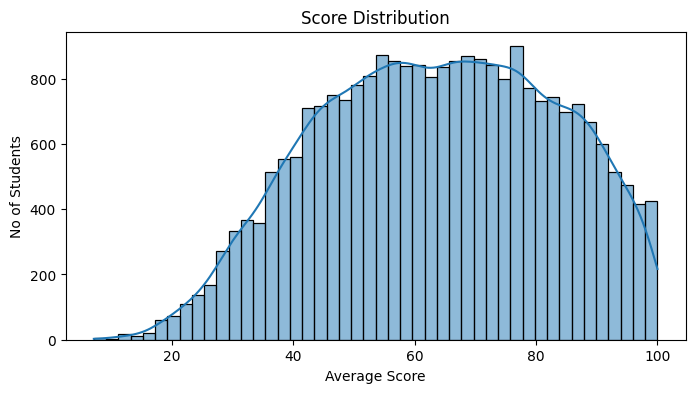

In [7]:
df["avg_score"] = df[["math_score", "science_score", "english_score"]].mean(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(df["avg_score"], kde=True)
plt.title("Score Distribution")
plt.xlabel("Average Score")
plt.ylabel("No of Students")
plt.show()


## 2.Gender vs Performance Chart

In [11]:
gender_avg = df.groupby("gender")["math_score"].mean()
gender_avg

gender
female    64.045428
male      63.872754
other     63.447170
Name: math_score, dtype: float64

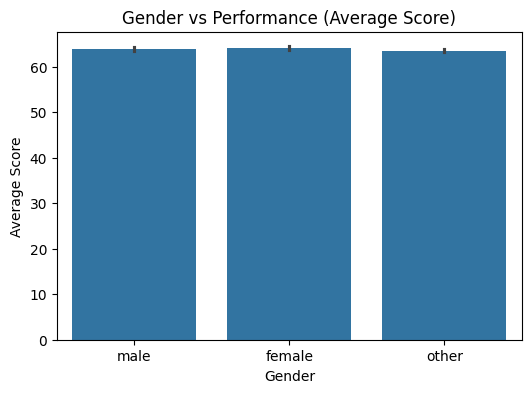

In [16]:
score_cols = ["math_score", "science_score", "english_score", "overall_score"]
df["avg_score"] = df[score_cols].mean(axis=1)
plt.figure(figsize=(6,4))

sns.barplot(x="gender", y="avg_score", data=df, estimator='mean')

plt.title("Gender vs Performance (Average Score)")
plt.xlabel("Gender")
plt.ylabel("Average Score")

plt.show()

## 3.Correlation Heatmap

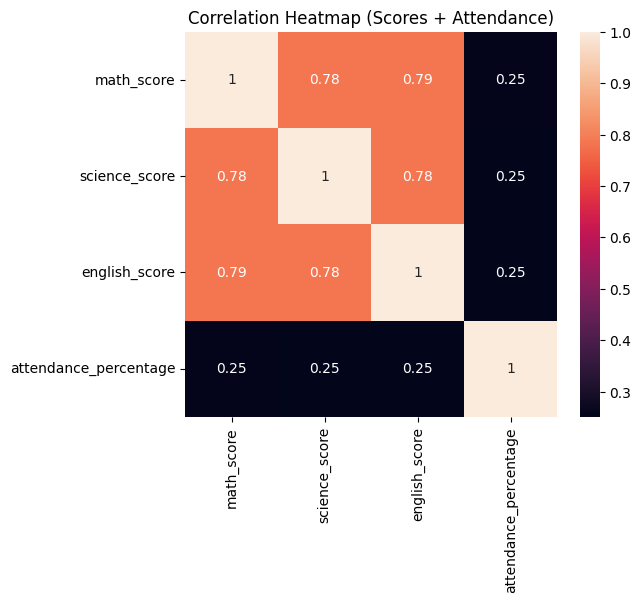

In [14]:
plt.figure(figsize=(6,5))

selected = df[["math_score", "science_score", "english_score", "attendance_percentage"]]

corr = selected.corr()

sns.heatmap(corr, annot=True)

plt.title("Correlation Heatmap (Scores + Attendance)")
plt.show()


## 4. Attendance vs Score Trend Chart

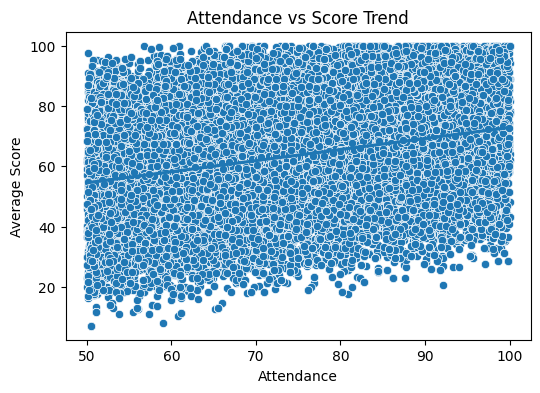

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="attendance_percentage", y="avg_score", data=df)
sns.regplot(x="attendance_percentage", y="avg_score", data=df, scatter=False)
plt.title("Attendance vs Score Trend")
plt.xlabel("Attendance")
plt.ylabel("Average Score")
plt.show()
